In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
visits = pd.read_csv('visits.csv')
transactions = pd.read_csv('transactions.csv')

In [5]:
visits

,visit_id,customer_id
0,1,23
1,2,9
2,4,30
3,5,54
4,6,96
5,7,54
6,8,54


In [7]:
transactions

,transaction_id,visit_id,amount
0,2,5,310
1,3,5,300
2,9,5,200
3,12,1,910
4,13,2,970


In [20]:
merge = pd.merge(visits,transactions, on = 'visit_id', how = 'left')
merge = merge.query("transaction_id.isna()")

res = merge.groupby(['customer_id'], as_index = False).visit_id.nunique().rename(columns = {'visit_id':'count_no_trans'}).sort_values(['customer_id','count_no_trans'])

res

,customer_id,count_no_trans
0,30,1
1,54,2
2,96,1


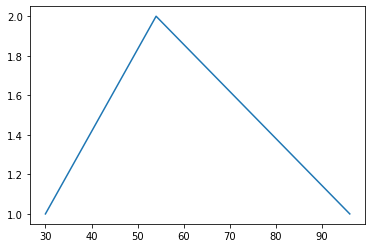

In [21]:
plt.figure()
plt.plot(res['customer_id'], res['count_no_trans'])
plt.show()